# Machine Learning & Model Training 


## By : Deep Contractor

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [2]:
df=pd.read_csv(r"C:\Users\deepc\Desktop\Data Work\TestData.csv")

In [3]:
df.columns

Index(['matchid', 'Players', 'BattingOrder', 'inning_bat', 'Bat_Bowler',
       'Bat_Dismissal', 'Bat_Runs', '4s', '6s', 'Ball Faced', 'Dots',
       'BattingTeam', 'inning_bowl', 'Over', 'Runs', 'Wicket', 'Maiden',
       'extra', 'fowRuns', 'wicketNumber', 'fowOver'],
      dtype='object')

In [4]:
df = df.filter(['matchid','inning_bat','Bat_Runs', '4s', '6s', 'Ball Faced', 'Dots',
       'BattingTeam' 'Over', 'Wicket','extra','Over'], axis = 1)
df=df.fillna(0)

# Exploratory Data Analysis

In [5]:
df.describe()

,matchid,inning_bat,Bat_Runs,4s,6s,Ball Faced,Dots,Wicket,extra,Over
count,1.618400e+04,16184.000000,16184.000000,16184.000000,16184.000000,16184.000000,16184.000000,16184.000000,16184.000000,16184.000000
mean,6.290481e+05,2.358255,25.925235,3.044612,0.193772,50.145452,38.028052,0.753460,1.282687,7.955944
std,2.314510e+05,1.077852,36.119767,4.337787,0.619082,64.046533,47.512340,1.361685,2.777320,11.322642
min,2.913520e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.308820e+05,1.000000,2.000000,0.000000,0.000000,8.000000,6.000000,0.000000,0.000000,0.000000
50%,5.673570e+05,2.000000,12.000000,1.000000,0.000000,26.000000,20.000000,0.000000,0.000000,0.000000
75%,7.983750e+05,3.000000,35.000000,4.000000,0.000000,67.250000,51.000000,1.000000,1.000000,15.000000
max,1.168120e+06,4.000000,333.000000,43.000000,11.000000,556.000000,405.000000,9.000000,41.000000,77.000000


In [6]:
df.corr()

,matchid,inning_bat,Bat_Runs,4s,6s,Ball Faced,Dots,Wicket,extra,Over
matchid,1.000000,0.018951,-0.017365,-0.028582,0.016169,-0.014932,-0.018627,0.008676,-0.052399,-0.004691
inning_bat,0.018951,1.000000,-0.132964,-0.135318,-0.050978,-0.125316,-0.121518,-0.055809,-0.060688,-0.101854
Bat_Runs,-0.017365,-0.132964,1.000000,0.944260,0.456868,0.933427,0.884609,-0.210804,-0.182081,-0.244563
4s,-0.028582,-0.135318,0.944260,1.000000,0.356710,0.856483,0.818780,-0.203875,-0.172930,-0.235869
6s,0.016169,-0.050978,0.456868,0.356710,1.000000,0.327335,0.289494,-0.040745,-0.037323,-0.036525
Ball Faced,-0.014932,-0.125316,0.933427,0.856483,0.327335,1.000000,0.990897,-0.232619,-0.198330,-0.270185
Dots,-0.018627,-0.121518,0.884609,0.818780,0.289494,0.990897,1.000000,-0.235636,-0.199149,-0.272979
Wicket,0.008676,-0.055809,-0.210804,-0.203875,-0.040745,-0.232619,-0.235636,1.000000,0.462700,0.697736
extra,-0.052399,-0.060688,-0.182081,-0.172930,-0.037323,-0.198330,-0.199149,0.462700,1.000000,0.585880
Over,-0.004691,-0.101854,-0.244563,-0.235869,-0.036525,-0.270185,-0.272979,0.697736,0.585880,1.000000


# Ball Faced vs Runs Scored

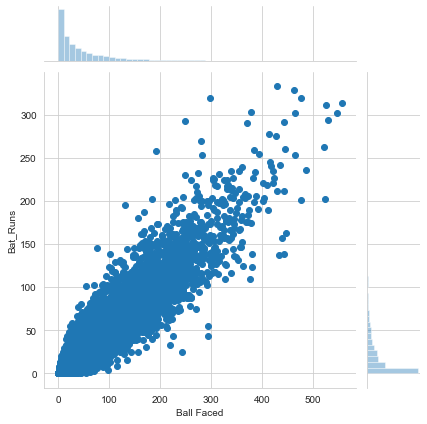

In [31]:
sns.jointplot(x='Ball Faced',y='Bat_Runs',data=df)

# Displaying correlation among all the columns using Heat Map


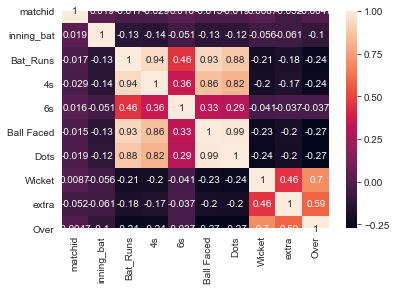

In [7]:
#displaying correlation using heat map
sns.heatmap(df.corr(), annot = True)

In [32]:
battingruns = list()
battingruns = df['Bat_Runs']
y=battingruns
X=df.filter(['4s', '6s', 'Ball Faced', 'Dots'], axis = 1)
X.columns

Index(['4s', '6s', 'Ball Faced', 'Dots'], dtype='object')

# Visualizing the Data using pairplot 


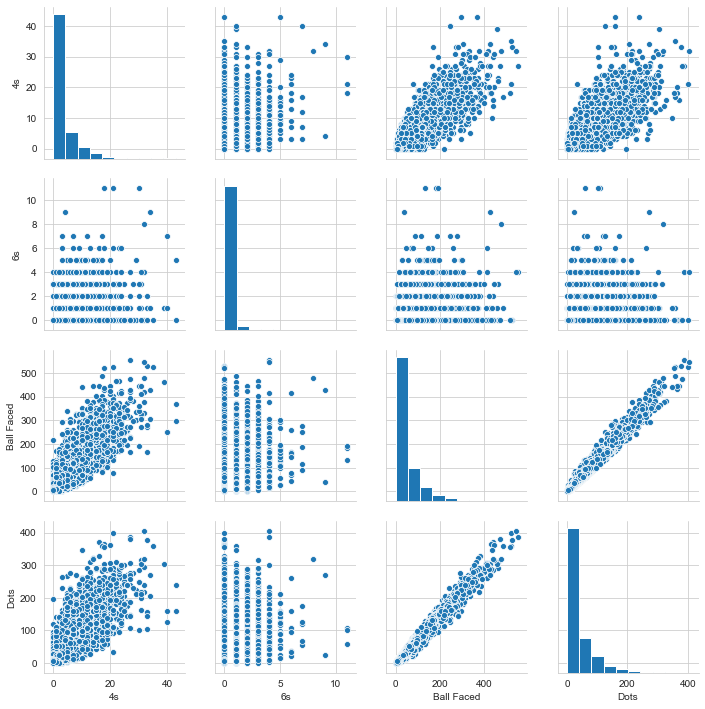

In [9]:
sns.pairplot(X)

# Distribution of runs

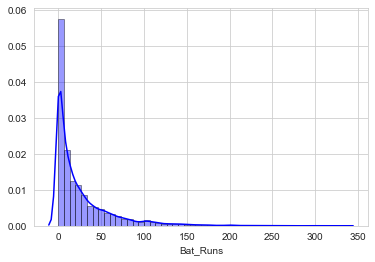

In [10]:
sns.distplot(df['Bat_Runs'],hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

# Training the Model¶


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [12]:
lm = LinearRegression() #linear regretion object

In [13]:
X_train = X_train.fillna(0)
y_train = y_train.fillna(0)

In [14]:
lm.fit(X_train, y_train) #training the dataset

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Model Evaluation

In [15]:
#Displaying the Intercept
print(lm.intercept_)

0.2762987617947914


In [16]:
print(lm.coef_)

[ 2.95451404  4.7819408   1.1759487  -1.13712951]


In [17]:
import statsmodels.api as sm

In [18]:
x=sm.add_constant(X)

C:\Users\deepc\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [19]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Bat_Runs   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          6.588e+05
Date:                Thu, 21 Nov 2019   Prob (F-statistic):                        0.00
Time:                        19:38:46   Log-Likelihood:                         -23347.
No. Observations:                9710   AIC:                                  4.670e+04
Df Residuals:                    9706   BIC:                                  4.673e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
4s             2.9670      0.013    222.112      0.000       2.941       2.993
6s             4.8129      0.049     97.640      0.000       4.716       4.909
Ball Faced     1.1718      0.004    298.442      0.000       1.164       1.179
Dots          -1.1298      0.005   -239.974      0.000      -1.139      -1.121
==============================================================================
Omnibus:                     3213.546   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55986.007
Skew:                           1.131   Prob(JB):                         0.00
Kurtosis:                      14.544   Cond. No.                         183.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Predictions from my Model

In [20]:
predictions = lm.predict(X_test)

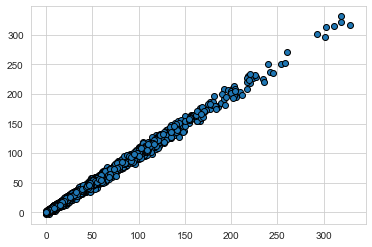

In [21]:
plt.scatter(y_test, predictions, edgecolor='black')

# Residual Histogram


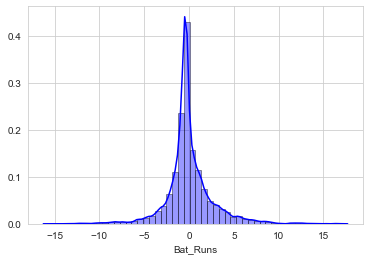

In [22]:
sns.distplot((y_test - predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')


# Mean Absolute Error
# Mean Squared Error
# and the Root Mean Squared Error 

In [23]:
from sklearn import metrics

In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.6650243288117625
MSE: 6.759061212619646
RMSE: 2.5998194576969467


# Co-efficients

In [26]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
4s,2.954514
6s,4.781941
Ball Faced,1.175949
Dots,-1.137130
